## Experimental and observational basis for phase transitions in the Earth

### Mineral Physics Experiments

With the development of high-pressure diamond-anvil cell experiments, constraints on a mineral's density and elastic properties at Earth-like conditions were available. Specifically, such experiments could provide information about on a mineral's density ($\rho$), shear modulus ($\mu$), and bulk modulus ($K$), and how these properties vary with pressure and temperature.

Such experiments on olivine—the dominant mantle mineral—suggest a solid-solid phase transition of olivine to higher-density structures, $\beta-$ and $\gamma-$ spinel near 410 km and 660 km depths, respectively. Besides olivine, pyroxenes (second most abundant upper mantle mineral), also occur in different phases (stishovite, garnet) depending on the temperature-pressure conditions.

The figure below show the major mineral phases for a depleted (peridotite) and an enriched (pyroxenite) upper mantle composition.  

<div align="center">
<img src='./images/upper_mantle_phase_transitions.png' width="600"/>
<figcaption align = "center"> Mineralogy of mantle rocks with peridotitic (left) and basaltic (right) bulk composition as a function of depth. Mineral phase abbreviations are described in the appendix. Image: Smith et al., 2018. </figcaption>
</div>

### Seismological observations

When a mineral phase transition occurs, the resulting change in density and elastic properties of the medium are essentially captured as the change in seismic velocities,  i.e., $Vp = \sqrt{\frac{(K + 4\mu/3 )}{\rho}}$ and $Vs = \sqrt{\mu/\rho}$. (See the Stress and Strain Module for more details.) The change in the seismic velocities are recorded as converted seismic phases, PdP (or SdS), where d is the depth of the discontinutiy.

Global seismological observations revealed discontinuities in both S-wave and P-wave velocities in the upper mantle (see figure below). The most prominent and most studied mantle discontinuities are:

- **410** : Occurs around 410 km as a result of Olivine to Wadsleyite phase transition. Observed as seismic velocity increase of ~4–10% (e.g, Shearer and Flanagan, 1999), depending on the temperature, pressure, rock composition and water content conditions.

- **660** : Occurs in most regions around 660 km as a result of Ringwoodite to perovskite and magnesiowüstite phase transition. Observed as seismic velocity increase of ~2–6% (e.g, Shearer and Flanagan, 1999), depending on the temperature, pressure, rock composition and water content conditions.

Additionally, a discontinious weak seismic discontinuity is also observed at ~ **520** km due to the Wadsleyite to Ringwoodite phase transition.




<div>
<img src='./images/seismic_observations.png' width="800"/>
<figcaption align = "center"> Reference S- and P-wave velocity
structure in the upper mantle and transition zone for select models and by Cammarano et al., 2005. Image: Frost, 2008 </figcaption>
</div>

### Calculating seismological reference profile using BurnMan

[BurnMan](https://burnman.readthedocs.io/en/latest/introduction.html) is an open-source software that can model physical and chemical properties of a mineral, fluid or a mineral assemblage.

Here, we will use BurnMan to compute a seismological reference profile for forsterite to a depth of 410 km and wadsleyite below that from 410-600 km, to model the jump in seismological properties at the 410-km boundary.

In [ ]:
# install the library
! pip install burnman

In [ ]:
# load the necessary libraries and classes
import numpy as np
import matplotlib.pyplot as plt

import burnman
from burnman import minerals, Layer
from burnman.classes.solution import Solution
from burnman.classes.solutionmodel import IdealSolution

In [ ]:
# The following line describes the rock composition.
fo = minerals.SLB_2022.forsterite()  # Mg-rich end member olivine
wa = minerals.SLB_2022.mg_wadsleyite() # Mg-rich high-pressure phase of olivine

# The following lines defines the depth values at which computation
# needs to be done. We do computations until upper mantle depths.
depths1 = np.linspace(410e3, 100e3, 32)
depths2 = np.linspace(600e3, 410e3, 20)

# We choose an adiabatic profile with 1300 C as the mantle potential temperature
layer1 = Layer(name='Upper Mantle', radii=6371.e3-depths1)
layer1.set_material(fo)
layer1.set_temperature_mode(temperature_mode='adiabatic',
                                  temperature_top=1573.)

layer1.set_pressure_mode(pressure_mode='self-consistent',
                               pressure_top=4.6e9,
                               gravity_bottom=9.8)

layer1.make()

# We choose the temperature at the bottom of above layer as the top temperature
# for this layer's profile
layer2 = Layer(name='Upper Mantle 2', radii=6371.e3-depths2)
layer2.set_material(wa)
layer2.set_temperature_mode(temperature_mode='adiabatic',
                                  temperature_top=layer1.temperature[0])

layer2.set_pressure_mode(pressure_mode='self-consistent',
                         pressure_top=layer1.pressure[0],
                         gravity_bottom=9.8)

layer2.make()

In [ ]:
mat_rho1, mat_vp1, mat_vs1 = layer1.evaluate(["density", "v_p", "v_s"],
                                             6371e3-depths1, layer1.temperature)

mat_rho2, mat_vp2, mat_vs2 = layer2.evaluate(["density", "v_p", "v_s"],
                                             6371e3-depths2,
                                             layer2.temperature)

# Combine the data for plotting
all_depths = np.hstack((depths2, depths1)) / 1e3
all_vs     = np.hstack((mat_vs2, mat_vs1)) / 1.0e3
all_vp     = np.hstack((mat_vp2, mat_vp1)) / 1.0e3
all_rho    = np.hstack((mat_rho2, mat_rho1)) / 1.0e3

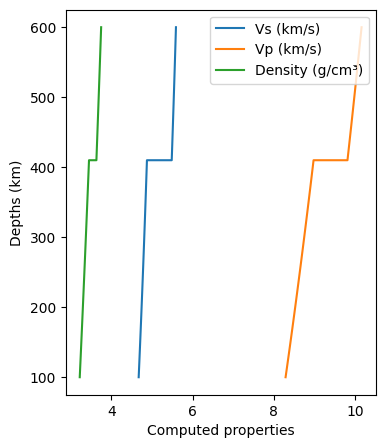

In [ ]:
# plot the computed profiles
fig, (ax1) = plt.subplots(figsize=(4,5))

ax1.plot(all_vs,  all_depths, label="Vs (km/s)")
ax1.plot(all_vp,  all_depths, label="Vp (km/s)")
ax1.plot(all_rho, all_depths, label="Density (g/cm³)")
ax1.set_ylabel("Depths (km)")
ax1.set_xlabel("Computed properties")
plt.legend()

### References

- Shearer, P. M., & Flanagan, M. P. (1999). Seismic velocity and density jumps across the 410-and 660-kilometer discontinuities. Science, 285(5433), 1545-1548.

- Smith, E. M., Shirey, S. B., Richardson, S. H., Nestola, F., Bullock, E. S., Wang, J., & Wang, W. (2018). Blue boron-bearing diamonds from Earth’s lower mantle. Nature, 560,  [(7716), 84-87](https://doi.org/10.1038/s41586-018-0334-5).

-  Frost, D. J. (2008). The upper mantle and transition zone. Elements, 4(3), [171-176](https://doi.org/10.2113/GSELEMENTS.4.3.171).


### Appendix

Mineral-phase abbreviations used:

- ol:  olivine
- opx: orthopyroxene
- cpx: clinopyroxene
- hpopx: high-pressure opx
- capv: calcium perovskite
- CF: calcium-ferrite-type phase
- NAL: new aluminous phase.

&nbsp;<div style="text-align: right">  
    &rarr; <b>NEXT: [Clapeyron slope](./2_Clapeyron_slope.ipynb) </b> <a href=""></a> &nbsp;&nbsp;
     <img src="../assets/education-gem-notebooks_icon.png" alt="icon"  style="width:4%">
  </div>